# 사전준비

In [ ]:
# 구글 서버와 내 드라이브 연결 및 작업 디렉토리 변경
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'


# 이것저것 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
# 데이터는 17년도~22년도 전부 사용.

df_2017 = pd.read_csv('서울시 상권분석서비스(상권_추정매출)_2017.csv', encoding='cp949')
df_2018 = pd.read_csv('서울시 상권분석서비스(상권_추정매출)_2018.csv', encoding='cp949')
df_2019 = pd.read_csv('서울시 상권분석서비스(상권_추정매출)_2019.csv', encoding='cp949')
df_2020 = pd.read_csv('서울시 상권분석서비스(상권_추정매출)_2020.csv', encoding='cp949')
df_2021 = pd.read_csv('서울시 상권분석서비스(상권_추정매출)_2021.csv', encoding='cp949')
df_2022 = pd.read_csv('서울시 상권분석서비스(상권_추정매출)_2022.csv', encoding='cp949')

In [ ]:
# 잘 불러왔는지 확인
df_2022

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구,행정동,서비스_업종_코드,서비스_업종_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,CS300043,전자상거래업,...,0,34,982,77,779,87,24,44,5,6
1,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,CS300032,가전제품,...,132,2208,1920,90,1044,1278,894,666,156,8
2,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,CS300031,가구,...,0,1421,2491,0,106,212,781,785,2028,6
3,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,CS300028,화초,...,36,4594,3400,54,2085,2412,1687,571,1183,5
4,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,CS300026,완구,...,0,1687,1349,228,857,687,1063,200,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136815,2022,1,A,골목상권,2110001,이북5도청사,종로구,평창동,CS200001,일반교습학원,...,0,96,40,0,0,0,120,16,0,3
136816,2022,1,A,골목상권,2110001,이북5도청사,종로구,평창동,CS100010,커피-음료,...,0,955,1009,0,382,342,380,581,279,*
136817,2022,1,A,골목상권,2110001,이북5도청사,종로구,평창동,CS100009,호프-간이주점,...,18,115,18,0,0,18,18,54,44,*
136818,2022,1,A,골목상권,2110001,이북5도청사,종로구,평창동,CS100008,분식전문점,...,0,5872,3689,26,401,1191,2273,3093,2576,3


In [ ]:
print(f'17년도 서울시 매출자료 건수 : {len(df_2017)}')
print(f'18년도 서울시 매출자료 건수 : {len(df_2018)}')
print(f'19년도 서울시 매출자료 건수 : {len(df_2019)}')
print(f'20년도 서울시 매출자료 건수 : {len(df_2020)}')
print(f'21년도 서울시 매출자료 건수 : {len(df_2021)}')
print(f'22년도 서울시 매출자료 건수 : {len(df_2022)}')

17년도 서울시 매출자료 건수 : 180714
18년도 서울시 매출자료 건수 : 177153
19년도 서울시 매출자료 건수 : 147972
20년도 서울시 매출자료 건수 : 144749
21년도 서울시 매출자료 건수 : 140830
22년도 서울시 매출자료 건수 : 136820


In [ ]:
# 결측치 확인 및 제거
# df_2022.isna().sum().head(50)
# 결측치는 없었다!
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180714 entries, 0 to 180713
Data columns (total 82 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년_코드          180714 non-null  int64  
 1   기준_분기_코드         180714 non-null  int64  
 2   상권_구분_코드         180714 non-null  object 
 3   상권_구분_코드_명       180714 non-null  object 
 4   상권_코드            180714 non-null  int64  
 5   상권_코드_명          180714 non-null  object 
 6   자치구              180714 non-null  object 
 7   행정동              180714 non-null  object 
 8   서비스_업종_코드        180714 non-null  object 
 9   서비스_업종_코드_명      180714 non-null  object 
 10  분기당_매출_금액        180714 non-null  float64
 11  분기당_매출_건수        180714 non-null  int64  
 12  주중_매출_비율         180714 non-null  int64  
 13  주말_매출_비율         180714 non-null  int64  
 14  월요일_매출_비율        180714 non-null  int64  
 15  화요일_매출_비율        180714 non-null  int64  
 16  수요일_매출_비율        180714 non-null  int6

In [ ]:
df_2017.자치구.value_counts()

강남구     12158
송파구      9772
영등포구     8547
마포구      8416
서초구      8299
강서구      8022
관악구      7874
강동구      7835
은평구      7808
성북구      7583
중구       7297
동대문구     7155
광진구      7056
중랑구      7043
종로구      6921
구로구      6879
양천구      6630
동작구      6436
강북구      6208
용산구      5992
서대문구     5771
성동구      5629
노원구      5228
금천구      5128
도봉구      5027
Name: 자치구, dtype: int64

# 25개 구 별로 분석

## 17년~22년 데이터 합치기

In [ ]:
# 우선 25개 구 별로 분석한 뒤 매출 변화가 큰 상위 구에서만 다시 분석...?
# 아니면 df 다 합치고 시작??
# 일단 뭐든 해 보자.

# 17년~ 22년 데이터 합치기
df_list = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
whole_df = pd.concat(df_list, ignore_index=True)

# 확인
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928238 entries, 0 to 928237
Data columns (total 82 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년_코드          928238 non-null  int64  
 1   기준_분기_코드         928238 non-null  int64  
 2   상권_구분_코드         928238 non-null  object 
 3   상권_구분_코드_명       928238 non-null  object 
 4   상권_코드            928238 non-null  int64  
 5   상권_코드_명          928238 non-null  object 
 6   자치구              928238 non-null  object 
 7   행정동              928238 non-null  object 
 8   서비스_업종_코드        928238 non-null  object 
 9   서비스_업종_코드_명      928238 non-null  object 
 10  분기당_매출_금액        928238 non-null  float64
 11  분기당_매출_건수        928238 non-null  int64  
 12  주중_매출_비율         928238 non-null  int64  
 13  주말_매출_비율         928238 non-null  int64  
 14  월요일_매출_비율        928238 non-null  int64  
 15  화요일_매출_비율        928238 non-null  int64  
 16  수요일_매출_비율        928238 non-null  int6

In [ ]:
# whole_df.to_excel('whole_df.xlsx')
# RAM 부족으로 다운

In [ ]:
whole_df.자치구.value_counts()

강남구     62004
송파구     50547
영등포구    43411
마포구     42626
강서구     42181
서초구     42046
관악구     40432
강동구     40294
은평구     40293
성북구     38636
중구      37250
동대문구    37070
광진구     36799
중랑구     36688
구로구     35191
양천구     34666
종로구     34621
동작구     32762
강북구     31962
용산구     30341
서대문구    29693
성동구     28696
노원구     27187
금천구     26632
도봉구     26210
Name: 자치구, dtype: int64

## 25개 구 별로 df 나누기

In [ ]:
# 구 별로 나누자

'''
강남구     62004
송파구     50547
영등포구    43411
마포구     42626
강서구     42181
서초구     42046
관악구     40432
강동구     40294
은평구     40293
성북구     38636
중구      37250
동대문구    37070
광진구     36799
중랑구     36688
구로구     35191
양천구     34666
종로구     34621
동작구     32762
강북구     31962
용산구     30341
서대문구    29693
성동구     28696
노원구     27187
금천구     26632
도봉구     26210
'''
df_gangnam = whole_df[whole_df.자치구=='강남구'].reset_index(drop=True)
df_songpa = whole_df[whole_df.자치구=='송파구'].reset_index(drop=True)
df_yeong = whole_df[whole_df.자치구=='영등포구'].reset_index(drop=True)
df_mapo = whole_df[whole_df.자치구=='마포구'].reset_index(drop=True)
df_gangseo = whole_df[whole_df.자치구=='강서구'].reset_index(drop=True)
df_seocho = whole_df[whole_df.자치구=='서초구'].reset_index(drop=True)
df_gwanak = whole_df[whole_df.자치구=='관악구'].reset_index(drop=True)
df_gangdong = whole_df[whole_df.자치구=='강동구'].reset_index(drop=True)
df_eunpyeong = whole_df[whole_df.자치구=='은평구'].reset_index(drop=True)
df_seongbuk = whole_df[whole_df.자치구=='성북구'].reset_index(drop=True)
df_jung = whole_df[whole_df.자치구=='중구'].reset_index(drop=True)
df_dong = whole_df[whole_df.자치구=='동대문구'].reset_index(drop=True)
df_gwangjin = whole_df[whole_df.자치구=='광진구'].reset_index(drop=True)
df_junglang = whole_df[whole_df.자치구=='중랑구'].reset_index(drop=True)
df_guro = whole_df[whole_df.자치구=='구로구'].reset_index(drop=True)
df_yangcheon = whole_df[whole_df.자치구=='양천구'].reset_index(drop=True)
df_jongno = whole_df[whole_df.자치구=='종로구'].reset_index(drop=True)
df_dongjak = whole_df[whole_df.자치구=='동작구'].reset_index(drop=True)
df_gangbuk = whole_df[whole_df.자치구=='강북구'].reset_index(drop=True)
df_yongsan = whole_df[whole_df.자치구=='용산구'].reset_index(drop=True)
df_seodaemun = whole_df[whole_df.자치구=='서대문구'].reset_index(drop=True)
df_seongdong = whole_df[whole_df.자치구=='성동구'].reset_index(drop=True)
df_nowon = whole_df[whole_df.자치구=='노원구'].reset_index(drop=True)
df_geumcheon = whole_df[whole_df.자치구=='금천구'].reset_index(drop=True)
df_dobong = whole_df[whole_df.자치구=='도봉구'].reset_index(drop=True)

In [ ]:
# 제대로 나눠졌는지 확인

print(df_gangnam.자치구.value_counts())
print('='*100)
df_gangnam

강남구    62004
Name: 자치구, dtype: int64


,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구,행정동,서비스_업종_코드,서비스_업종_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2017,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100001,한식음식점,...,1431,7259,5874,127,3987,4257,2803,1400,561,18
1,2017,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100002,중식음식점,...,82,2986,2019,44,1568,1540,1015,615,226,3
2,2017,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100003,일식음식점,...,0,2983,5623,377,3589,2342,1393,666,241,0
3,2017,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100004,양식음식점,...,760,3493,3069,95,1858,2497,1193,538,385,9
4,2017,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100007,치킨전문점,...,638,579,341,4,211,312,196,137,62,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61999,2022,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100007,치킨전문점,...,105,408,298,0,45,191,115,216,135,*
62000,2022,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100004,양식음식점,...,229,1121,1211,30,645,794,397,307,160,3
62001,2022,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100003,일식음식점,...,37,30,7,0,7,22,7,0,0,*
62002,2022,1,A,골목상권,2110949,한남IC,강남구,신사동,CS100002,중식음식점,...,14,3098,723,14,498,747,1148,796,618,*


## 25개 구 별로 매출변화 그래프 그리기

In [ ]:
# 매출변화 그리기 위해서 df를 정리(1)

gangnam_sales = df_gangnam.groupby(['기준_년_코드', '기준_분기_코드'])['분기당_매출_금액'].sum().reset_index()
gangnam_sales

,기준_년_코드,기준_분기_코드,분기당_매출_금액
0,2017,1,3.246094e+12
1,2017,2,3.323985e+12
2,2017,3,3.306069e+12
3,2017,4,3.286761e+12
4,2018,1,3.217791e+12
5,2018,2,3.288538e+12
6,2018,3,3.269381e+12
7,2018,4,3.663275e+12
8,2019,1,2.756723e+12
9,2019,2,2.590175e+12


In [ ]:
# 매출변화 그리기 위해서 df를 정리(2)

# 연도와 분기 열 합치기
col = ['기준_년_코드', '기준_분기_코드']
gangnam_sales['연도-분기'] = gangnam_sales[col].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
gangnam_sales.drop(['기준_년_코드', '기준_분기_코드'], axis=1, inplace=True)
gangnam_sales = gangnam_sales[['연도-분기', '분기당_매출_금액']]

# 잘 되었는지 확인
print(f'정리한 df에서의 사용한 결과 : {gangnam_sales.분기당_매출_금액.sum()}')
print(f'원본 df에서의 결과 : {df_gangnam.분기당_매출_금액.sum()}')

# 출력된 결과로부터 잘 정리되었음을 확인할 수 있음.
gangnam_sales

정리한 df에서의 사용한 결과 : 74701788855948.0
원본 df에서의 결과 : 74701788855948.0


,연도-분기,분기당_매출_금액
0,2017-1,3.246094e+12
1,2017-2,3.323985e+12
2,2017-3,3.306069e+12
3,2017-4,3.286761e+12
4,2018-1,3.217791e+12
5,2018-2,3.288538e+12
6,2018-3,3.269381e+12
7,2018-4,3.663275e+12
8,2019-1,2.756723e+12
9,2019-2,2.590175e+12


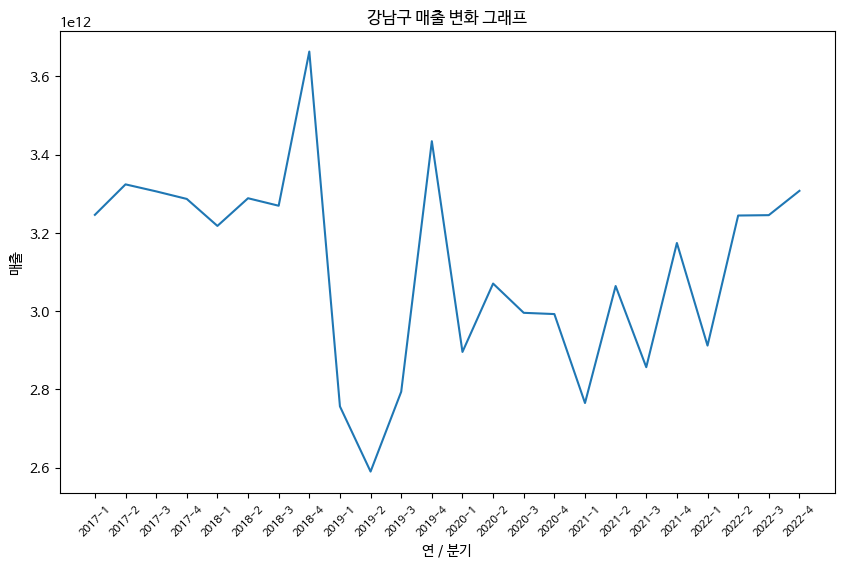

In [ ]:
# 그래프 그려보기

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))
plt.xticks(size=8, rotation=45)
plt.plot(gangnam_sales['연도-분기'], gangnam_sales['분기당_매출_금액'])
plt.title('강남구 매출 변화 그래프')
plt.xlabel('연 / 분기')
plt.ylabel('매출')
plt.show()

In [ ]:
# df 정리하는 과정을 함수로 작성해보자.

def quarter_df(df):
    df_sales = df.groupby(['기준_년_코드', '기준_분기_코드'])['분기당_매출_금액'].sum().reset_index()
    col = ['기준_년_코드', '기준_분기_코드']
    df_sales['연도-분기'] = df_sales[col].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
    df_sales.drop(['기준_년_코드', '기준_분기_코드'], axis=1, inplace=True)
    df_sales = df_sales[['연도-분기', '분기당_매출_금액']]

    return df_sales


# 함수가 제대로 작성되었는지 확인하기
songpa_sales = quarter_df(df_songpa)
print(f'함수 사용한 결과 : {songpa_sales.분기당_매출_금액.sum()}')
print(f'원 df에서의 결과 : {df_songpa.분기당_매출_금액.sum()}')
# 굿!

함수 사용한 결과 : 41558051444195.0
원 df에서의 결과 : 41558051444195.0


In [ ]:
# 그래프 그려주는 함수도 작성해보았다.
# 위에서 그렸던 그래프보다 좀 더 보기 좋게 그릴 것.
# 그래프를 제대로 그려주는지 확인하기 위해 new_df 함수와 분리해놓음.

def quarter_graph(df):
    df_sales = df.groupby(['기준_년_코드', '기준_분기_코드'])['분기당_매출_금액'].sum().reset_index()
    col = ['기준_년_코드', '기준_분기_코드']
    df_sales['연도-분기'] = df_sales[col].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
    df_sales.drop(['기준_년_코드', '기준_분기_코드'], axis=1, inplace=True)
    df_sales = df_sales[['연도-분기', '분기당_매출_금액']]

    plt.rc('font', family='NanumBarunGothic')
    plt.figure(figsize=(9, 6))
    plt.xticks(size=8, rotation=45)     # x축 눈금 라벨 폰트 사이즈 8로 지정하고 45도 회전
    plt.plot(df_sales['연도-분기'], df_sales['분기당_매출_금액'], marker='.', markersize=7)     # marker 추가
    plt.title(df.자치구[0] + ' ' + '매출 변화 그래프')
    plt.xlabel('연 / 분기')
    plt.ylabel('매출')
    plt.legend(labels=['매출 변화'], loc='best', fontsize=12)       # 범례 추가. https://cosmosproject.tistory.com/436 참고.
    plt.grid(True)      # 격자 그래프로 그리자 포햄으로 백만원주기
    plt.show()

    return plt.show()

In [ ]:
# 25개 구 별로 매출 변화 그래프 그리기.

In [ ]:
quarter_graph(df_gangnam)

In [ ]:
quarter_graph(df_yeong)

In [ ]:
quarter_graph(df_mapo)

In [ ]:
quarter_graph(df_seocho)

In [ ]:
quarter_graph(df_gwanak)

In [ ]:
quarter_graph(df_jongno)

In [ ]:
# 25개의 그래프를 한 화면에 보고 싶은데... ??

In [ ]:
####################################################
##################### 6/24(토) #####################
####################################################



# 19년도에 매출이 바닥을 찍은 것은 코로나의 영향으로 보임.
# 그 이후, 매출이 상향세를 보이는 구는 강남 영등포 마포 서초 관악 종로 6개구.
# 그런데 상권분석 데이터와는 경향이 다르다(다이나믹, 정체, 축소, 확장...)
# 매출이 상향세를 보이는 것과 상권이 확장/축소되는 것은 다른 걸까?? 좀 더 고민이 필요하다.

# 우선은, 위 6개구에 대해서 좀 더 자세히 분석해보아야 할 것 같다.
# 기준은...?